In [1]:
import tensorflow as tf

In [4]:
print(f"Tensorflow verison: {tf.__version__}")
print(f"Keras version: {tf.keras.__version__}")

Tensorflow verison: 2.12.0
Keras version: 2.12.0


In [6]:
import pandas as pd
import numpy as np

In [8]:
wine_data = pd.read_csv('Wine_Quality_Dataset.csv')

In [10]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [11]:
wine_data.shape

(1599, 12)

In [13]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   object 
dtypes: float64(11), object(1)
memory usage: 150.0+ KB


In [14]:
wine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [15]:
wine_data['quality'].unique()

array(['bad', 'good'], dtype=object)

In [17]:
df1 = wine_data

In [22]:
df1['quality'] = [i.replace('bad','0').replace('good','1') for i in df1['quality']]

In [33]:
df1['quality'] = df1['quality'].astype('int')

In [34]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [35]:
df1['quality'].value_counts()

1    855
0    744
Name: quality, dtype: int64

In [36]:
X = df1.drop(columns='quality')
y = df1['quality']

In [469]:
from sklearn.model_selection import train_test_split
X_train_full,X_test,y_train_full,y_test = train_test_split(X,y,test_size = 0.20,random_state=42)

In [470]:
X_train_full.shape

(1279, 11)

In [471]:
X_test.shape

(320, 11)

In [472]:
y_train_full.shape

(1279,)

In [473]:
y_test.shape

(320,)

In [475]:
X_train,X_validation,y_train,y_validation = train_test_split(X_train_full,y_train_full,test_size=0.10,random_state=42)

In [476]:
X_train.shape

(1151, 11)

In [477]:
X_validation.shape

(128, 11)

In [478]:
y_train.shape

(1151,)

In [479]:
y_validation.shape

(128,)

In [487]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [488]:
X_train_scaled = scaler.fit_transform(X_train)

In [489]:
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
144,5.2,0.340,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.0
279,8.9,0.400,0.32,5.6,0.087,10.0,47.0,0.99910,3.38,0.77,10.5
204,7.0,0.430,0.36,1.6,0.089,14.0,37.0,0.99615,3.34,0.56,9.2
924,8.6,0.470,0.27,2.3,0.055,14.0,28.0,0.99516,3.18,0.80,11.2
1135,8.0,0.250,0.43,1.7,0.067,22.0,50.0,0.99460,3.38,0.60,11.9
...,...,...,...,...,...,...,...,...,...,...,...
1349,6.9,0.570,0.00,2.8,0.081,21.0,41.0,0.99518,3.41,0.52,10.8
1306,9.7,0.690,0.32,2.5,0.088,22.0,91.0,0.99790,3.29,0.62,10.1
206,12.8,0.300,0.74,2.6,0.095,9.0,28.0,0.99940,3.20,0.77,10.8
830,7.5,0.685,0.07,2.5,0.058,5.0,9.0,0.99632,3.38,0.55,10.9


In [490]:
X_train_scaled

array([[-1.8019981 , -1.05889358, -1.38541168, ...,  2.35201164,
         0.72693334,  3.36401421],
       [ 0.34282284, -0.72706288,  0.24657997, ...,  0.4304917 ,
         0.61408685,  0.06457997],
       [-0.7585717 , -0.56114753,  0.45057893, ...,  0.17428904,
        -0.57080125, -1.16092418],
       ...,
       [ 2.60358003, -1.28011404,  2.38856901, ..., -0.72242027,
         0.61408685,  0.34738861],
       [-0.46873103,  0.84913294, -1.0284135 , ...,  0.4304917 ,
        -0.62722449,  0.44165816],
       [-1.04841236,  0.46199713, -1.38541168, ...,  0.94289702,
        -0.06299207, -1.16092418]])

In [491]:
X_validation_scaled = scaler.transform(X_validation)

In [492]:
X_validation_scaled

array([[-0.64263543, -0.67175776,  0.14458049, ...,  0.81479569,
        -0.79649422, -0.97238508],
       [ 1.73405803,  0.48964969,  2.03157084, ..., -0.59431894,
         0.16270091,  2.79839691],
       [-0.87450796,  0.48964969, -0.97741376, ...,  0.68669436,
         0.89620306, -0.87811553],
       ...,
       [-0.4107629 , -0.67175776, -0.16141794, ..., -0.21001495,
        -0.40153152, -0.87811553],
       [-0.87450796,  0.82148039, -0.31441716, ...,  0.4304917 ,
        -0.34510828, -0.12395913],
       [-0.70060356, -1.00358846,  0.09358075, ...,  0.68669436,
        -0.06299207,  0.53592771]])

In [493]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU
from keras.callbacks import EarlyStopping

In [494]:
LAYERS = [
           tf.keras.layers.Dense(11,name = 'input_layer'),    ## We have 11 input features
           tf.keras.layers.Dense(11,activation='relu',name = 'hidden_layer_1'),
           tf.keras.layers.Dense(7,activation='relu',name = 'hidden_layer_2'),
           tf.keras.layers.Dense(3,activation='relu',name = 'hidden_layer_3'),
           tf.keras.layers.Dense(1,activation='sigmoid',name = 'output_layer')

]

model = tf.keras.models.Sequential(LAYERS)

In [495]:
LOSS_FUNCTION = 'binary_crossentropy'
OPTIMIZER = 'adam'
METRIC = ['accuracy']

In [496]:
model.compile(loss=LOSS_FUNCTION,optimizer=OPTIMIZER,metrics=METRIC)

In [497]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, mode='min', verbose=1)

In [498]:
EPOCHS = 10

In [499]:
Validation_dataset = (X_validation_scaled,y_validation)

In [556]:
history = model.fit(X_train_scaled,y_train,epochs = EPOCHS,validation_data=Validation_dataset,batch_size=100,callbacks=[early_stopping])

Epoch 1/10
12/12 [==============================] - 0s 14ms/step - loss: 0.4105 - accuracy: 0.8063 - val_loss: 0.5807 - val_accuracy: 0.7188
Epoch 2/10
12/12 [==============================] - 0s 9ms/step - loss: 0.4047 - accuracy: 0.8106 - val_loss: 0.5778 - val_accuracy: 0.7266
Epoch 3/10
12/12 [==============================] - 0s 9ms/step - loss: 0.3979 - accuracy: 0.8193 - val_loss: 0.5743 - val_accuracy: 0.7188
Epoch 4/10
12/12 [==============================] - 0s 7ms/step - loss: 0.3932 - accuracy: 0.8245 - val_loss: 0.5720 - val_accuracy: 0.7266
Epoch 5/10
12/12 [==============================] - 0s 8ms/step - loss: 0.3905 - accuracy: 0.8315 - val_loss: 0.5709 - val_accuracy: 0.7266
Epoch 6/10
12/12 [==============================] - 0s 7ms/step - loss: 0.3888 - accuracy: 0.8341 - val_loss: 0.5695 - val_accuracy: 0.7500
Epoch 7/10
12/12 [==============================] - 0s 8ms/step - loss: 0.3878 - accuracy: 0.8393 - val_loss: 0.5687 - val_accuracy: 0.7500
Epoch 8/10
12/12 [=

In [557]:

model.summary()

Model: "sequential_44"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 11)                132       
                                                                 
 hidden_layer_1 (Dense)      (None, 11)                132       
                                                                 
 hidden_layer_2 (Dense)      (None, 7)                 84        
                                                                 
 hidden_layer_3 (Dense)      (None, 3)                 24        
                                                                 
 output_layer (Dense)        (None, 1)                 4         
                                                                 
Total params: 376
Trainable params: 376
Non-trainable params: 0
_________________________________________________________________


In [558]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.410468,0.806255,0.580730,0.718750
1,0.404694,0.810600,0.577764,0.726562
2,0.397851,0.819288,0.574310,0.718750
3,0.393170,0.824500,0.572048,0.726562
4,0.390546,0.831451,0.570949,0.726562
5,0.388822,0.834057,0.569528,0.750000
6,0.387846,0.839270,0.568687,0.750000
7,0.386955,0.841877,0.567669,0.750000
8,0.386240,0.842745,0.566473,0.750000
9,0.385584,0.841877,0.565260,0.757812


<Axes: >

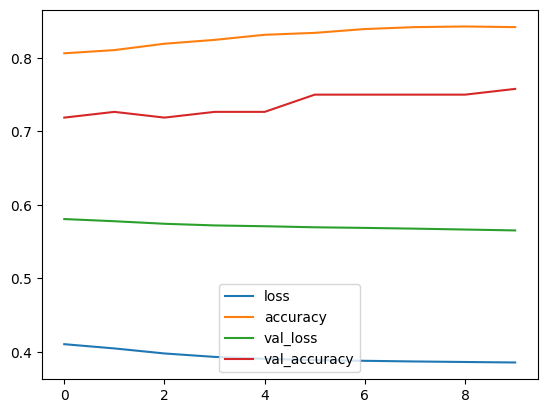

In [559]:
pd.DataFrame(history.history).plot()

In [560]:
X_test_scaled = scaler.transform(X_test)

In [561]:
model.evaluate(X_test_scaled,y_test)

10/10 [==============================] - 0s 2ms/step - loss: 0.5360 - accuracy: 0.7250


[0.5360249280929565, 0.7250000238418579]